In [1]:
import numpy as np
import sys
import scipy
from sklearn.preprocessing import OneHotEncoder
from scipy.special import expit
import time
import matplotlib.pyplot as plt

In [2]:
def gen_mask(n,d,p):
    R = np.random.rand(n,d)
    O = np.zeros((n,d))
    O[R < p] = 1
    return O

In [3]:
n = 10000
p = 0.01
k = 20

In [4]:
G = np.random.normal(0,1,(n,n))
O = gen_mask(n,n,p)
G = G*O
U = np.random.normal(0,1,(n,k))

In [5]:
Z = U.dot(U.T)+G

In [6]:
def power_iteration(U,G,v0,T):
    v = v0
    Ut = U.T
    Gt = G.T
    for i in range(T):
        u = U.dot(Ut.dot(v)) + G.dot(v)
        u = U.dot(Ut.dot(u)) + Gt.dot(u)
        v = u/np.linalg.norm(u)
    return v

def scipy_default(X):
    u,s,vt = scipy.sparse.linalg.svds(X,k=1)
    return vt.T

In [7]:
def run_scipy(X):
    start = time.time()
    v = scipy_default(X)
    end = time.time()
    t = end - start
    return v,t

def run_pi(U,G,v0,T):
    #v0 = np.random.normal(0,1,(G.shape[1],1))
    #v0 = v0/np.linalg.norm(v0)
    start = time.time()
    v = power_iteration(U,G,v0,T)
    end = time.time()
    t = end - start
    return v,t

In [8]:
t_scipy = 0.0
t_pi = [0.0]*20
v_pi = [0.0]*20
num_runs = 10
for i in range(num_runs):
    sys.stdout.write("%d / %d \r" %(i+1,num_runs))
    sys.stdout.flush()
    v,t = run_scipy(Z)
    t_scipy += t
    v0 = np.random.normal(0,1,(G.shape[1],1))
    v0 = v0/np.linalg.norm(v0)
    for j in range(20):
        v0,t = run_pi(U,G,v0,10)
        t_pi[j] += t
        v_pi[j] += min(np.linalg.norm(v0-v),np.linalg.norm(v0+v))
t_pi = [x/num_runs for x in t_pi]
v_pi = [x/num_runs for x in v_pi]
for j in range(1,20):
    t_pi[j] += t_pi[j-1]
print("Scipy svd time: ",t_scipy)
print("Power iteration time:",t_pi)

Scipy svd time:  16.172028303146362
Power iteration time: [0.5271583557128906, 1.0714661121368407, 1.59823579788208, 2.1311190605163572, 2.6719422340393066, 3.200266790390015, 3.7280841112136844, 4.254444932937623, 4.778913688659668, 5.303987979888916, 5.830049324035644, 6.355394983291625, 6.882603192329406, 7.405512714385986, 7.932202959060668, 8.45703580379486, 8.983737850189208, 9.513005614280699, 10.039047312736509, 10.566315460205075]


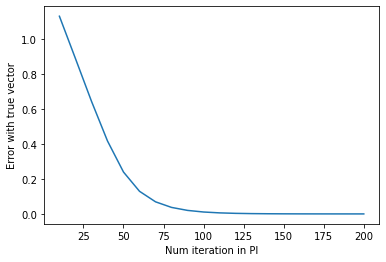

In [9]:
plt.xlabel('Num iteration in PI')
plt.ylabel('Error with true vector')
plt.plot(range(10,201,10),v_pi)